In [1]:
from hell_level import *

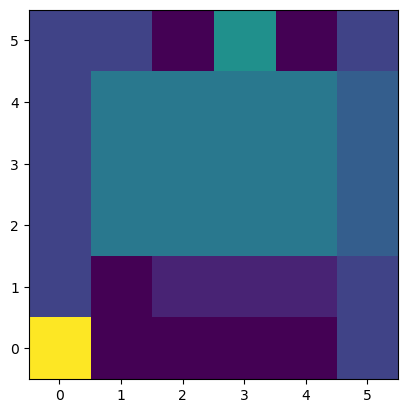

In [2]:
my_level = Level((6,6), (0, 0))
my_level.add_unmovable_obstacle((1, 0))
my_level.add_unmovable_obstacle((2, 0))
my_level.add_unmovable_obstacle((3, 0))
my_level.add_unmovable_obstacle((4, 0))
my_level.add_unmovable_obstacle((5, 0))
my_level.add_unmovable_obstacle((5, 1))
my_level.add_unmovable_obstacle((1, 5))
my_level.add_unmovable_obstacle((0, 5))
my_level.add_unmovable_obstacle((5, 5))
my_level.add_obstacle((1, 2))
my_level.add_obstacle((1, 3))
my_level.add_obstacle((1, 4))
my_level.add_laser((2, 5), (0, -1))
my_level.add_laser((3, 5), (0, -1))
my_level.add_laser((4, 5), (0, -1))
my_level.add_target((5, 3))
my_level.display_level()

In [22]:
%load_ext line_profiler
from random import randint

def eval_genomes(genomes, config):
    for genome_id, genome in genomes.items():
        net = neat.nn.FeedForwardNetwork.create(genome, config)
        
        my_level = Level((6,6), (0, 0))
        my_level.add_unmovable_obstacle((1, 0))
        my_level.add_unmovable_obstacle((2, 0))
        my_level.add_unmovable_obstacle((3, 0))
        my_level.add_unmovable_obstacle((4, 0))
        my_level.add_unmovable_obstacle((5, 0))
        my_level.add_unmovable_obstacle((5, 1))
        my_level.add_unmovable_obstacle((1, 5))
        my_level.add_unmovable_obstacle((0, 5))
        my_level.add_unmovable_obstacle((5, 5))
        my_level.add_obstacle((1, 2))
        my_level.add_obstacle((1, 3))
        my_level.add_obstacle((1, 4))
        my_level.add_laser((2, 5), (0, -1))
        my_level.add_laser((3, 5), (0, -1))
        my_level.add_laser((4, 5), (0, -1))
        my_level.add_target((5, 3))

        cumulative_reward = 0
        while True:
            activation = net.activate(my_level.level_matrix.ravel())
            step = np.argmax(activation)
            reward = my_level.step(step)
            cumulative_reward += reward
            if reward==0 or cumulative_reward < -100:
                break
        
        genome.fitness = cumulative_reward



%lprun -f eval_genomes eval_genomes(p.population, config)

Timer unit: 1e-06 s

Total time: 4.27105 s
File: <ipython-input-22-ab1eb1c0bd53>
Function: eval_genomes at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def eval_genomes(genomes, config):
     5       151        224.0      1.5      0.0      for genome_id, genome in genomes.items():
     6       150      96210.0    641.4      2.3          net = neat.nn.FeedForwardNetwork.create(genome, config)
     7       150       2748.0     18.3      0.1          my_level = Level((5,5), (3,4))
     8       150        593.0      4.0      0.0          my_level.add_obstacle((4, 4))
     9       150        245.0      1.6      0.0          my_level.add_obstacle((4, 1))
    10       150        223.0      1.5      0.0          my_level.add_obstacle((2, 3))
    11       150        205.0      1.4      0.0          my_level.add_obstacle((2, 2))
    12       150        219.0      1.5      0.0          my_level.add_obstacle((2, 4))
    13 

In [113]:
"""
2-input XOR example -- this is most likely the simplest possible example.
"""

import numpy as np
import neat
from IPython.display import clear_output


def eval_genomes(genomes, config):
    clear_output(wait=True)
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)

        my_level = Level((6,6), (0, 0))
        my_level.add_unmovable_obstacle((1, 0))
        my_level.add_unmovable_obstacle((2, 0))
        my_level.add_unmovable_obstacle((3, 0))
        my_level.add_unmovable_obstacle((4, 0))
        my_level.add_unmovable_obstacle((5, 0))
        my_level.add_unmovable_obstacle((5, 1))
        my_level.add_unmovable_obstacle((1, 5))
        my_level.add_unmovable_obstacle((0, 5))
        my_level.add_unmovable_obstacle((5, 5))
        my_level.add_obstacle((1, 2))
        my_level.add_obstacle((1, 3))
        my_level.add_obstacle((1, 4))
        my_level.add_laser((2, 5), (0, -1))
        my_level.add_laser((3, 5), (0, -1))
        my_level.add_laser((4, 5), (0, -1))
        my_level.add_target((5, 3))

        cumulative_reward = 0
        while True:
            activation = net.activate(my_level.level_matrix.ravel())
            step = np.argmax(activation)
            reward = my_level.step(step)
            cumulative_reward += reward
            if reward == 0 or cumulative_reward < -200:
                break

        genome.fitness = cumulative_reward


# Load configuration.
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     'config-feedforward')

# Create the population, which is the top-level object for a NEAT run.
p = neat.Population(config)

# Add a stdout reporter to show progress in the terminal.
p.add_reporter(neat.StdOutReporter(False))

# Run until a solution is found.
winner = p.run(eval_genomes, 100)

# Display the winning genome.
clear_output()
print('\nBest genome:\n{!s}'.format(winner))

# Show output of the most fit genome against training data.
print('\nOutput:')
winner_net = neat.nn.FeedForwardNetwork.create(winner, config)
print(winner_net)


KeyboardInterrupt: 